
#Brain Tumour using CNN

In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import math

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
Root = "/content/drive/MyDrive/brain tumour"
os.chdir(Root)

In [ ]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/brain tumour/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/brain tumour/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(2891, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(2891,2)


In [ ]:
np.count_nonzero(result ==1)

2891

Splitting


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

Model building

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [ ]:
y_train.shape

(2312, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
58/58 [==============================] - 167s 3s/step - loss: 8.7267 - val_loss: 0.6463
Epoch 2/30
58/58 [==============================] - 169s 3s/step - loss: 0.4733 - val_loss: 0.3633
Epoch 3/30
58/58 [==============================] - 163s 3s/step - loss: 0.2044 - val_loss: 0.3678
Epoch 4/30
58/58 [==============================] - 166s 3s/step - loss: 0.1521 - val_loss: 0.3595
Epoch 5/30
58/58 [==============================] - 170s 3s/step - loss: 0.1107 - val_loss: 0.3596
Epoch 6/30
58/58 [==============================] - 166s 3s/step - loss: 0.0971 - val_loss: 0.3515
Epoch 7/30
58/58 [==============================] - 166s 3s/step - loss: 0.0689 - val_loss: 0.3342
Epoch 8/30
58/58 [==============================] - 166s 3s/step - loss: 0.0491 - val_loss: 0.3327
Epoch 9/30
58/58 [==============================] - 174s 3s/step - loss: 0.0424 - val_loss: 0.2956
Epoch 10/30
58/58 [==============================] - 183s 3s/step - loss: 0.0404 - val_loss: 0.3101
Epoch 11/

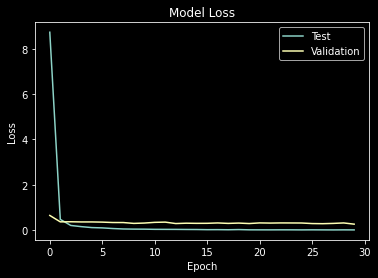

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Its a Tumor
100.0% Confidence Its a Tumor


Intensity of the Tumor :0.5
Area  of the Tumor covered :10.897797208610555


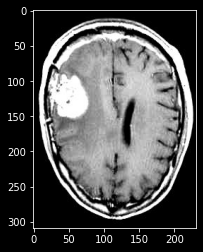

In [ ]:
import math
mri = "/content/drive/MyDrive/y2.jpg"

from matplotlib.pyplot import imshow
img = Image.open(mri)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)

classification = np.where(res == np.amax(res))[1][0]
print(names(classification))
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))
print()
print()
s = np.std(res)
img = plt.imread(mri)
h, w, _ = img.shape

if classification == 0:
  print("Intensity of the Tumor :"+ str(s))
  img= Image.open(mri)  
  img = np.array(img)  
  l = np.count_nonzero(img == 1)
  area = (0.264)* math.sqrt(l)
  print("Area  of the Tumor covered :"+ str(area))

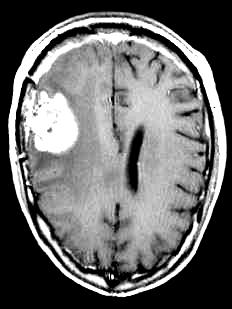

In [ ]:
img  = cv2.imread(mri,0)
cv2_imshow(img)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------

In [ ]:
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import io

In [ ]:
median_data = []
files = glob.glob(mri)
for myFile in files:
    print(myFile)
    image = cv2.imread(myFile, cv2.IMREAD_GRAYSCALE)
    median_data.append(image)

/content/drive/MyDrive/y2.jpg


/content/drive/MyDrive/y2.jpg


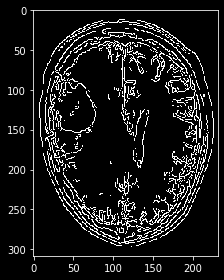

In [ ]:
# EDGE DETECTION---------------------------------------------------------------------------------
tumor_mask = []
files = glob.glob(mri)
for myFile in files:
    print(myFile)
    image = cv2.imread(myFile, cv2.IMREAD_GRAYSCALE)
    tumor_mask.append(image)

length = len(tumor_mask)
canny_edge_data = []

for i in range(length):
    L1 = cv2.Canny(tumor_mask[i], 100, 200, L2gradient=False)
    io.imshow(L1, cmap='gray')
    io.show()
    canny_edge_data.append(L1)

In [ ]:
# EDGE DILATION-----------------------------------------------------------------------------------
edge_dilated_data = []

for i in range(length):
    kernel = np.ones((5, 5), np.uint8)
    dilation = cv2.dilate(canny_edge_data[i], kernel, iterations=8)
    #io.imshow(dilation, cmap='gray')
    #io.show()
    edge_dilated_data.append(dilation)

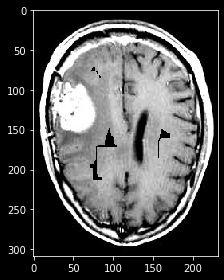

In [ ]:
# MASKING-----------------------------------------------------------------------------------------
masked_data = []

for i in range(length):
    edge_dilated_data[i] = cv2.resize(edge_dilated_data[i], median_data[i].shape[1::-1])
    dst = cv2.bitwise_and(median_data[i], edge_dilated_data[i])
    io.imshow(dst, cmap='gray')
    io.show()
    masked_data.append(dst)

Edge nature = Cloudy Edge


<ipython-input-89-ec343e401da0>:6: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ix = ndimage.filters.convolve(masked_data[i], kx)
<ipython-input-89-ec343e401da0>:7: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  iy = ndimage.filters.convolve(masked_data[i], ky)


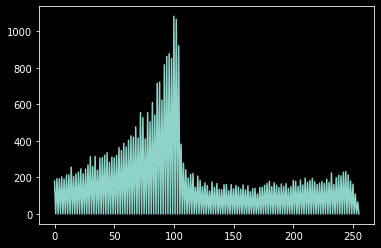

In [ ]:
# INTENSITY--------------------------------------------------------------------------------------
histogram = 0
for i in range(length):
    kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    ix = ndimage.filters.convolve(masked_data[i], kx)
    iy = ndimage.filters.convolve(masked_data[i], ky)
    g = np.hypot(ix, iy)
    g = g / g.max() * 255
    histogram = cv2.calcHist([g.astype(np.uint8)], [0], None, [256], [128, 256])
    list_data = np.array(g, dtype=np.float64)
    std_deviation = np.std(list_data)
    #print("Edge intensity = " + str(std_deviation))
    if std_deviation <= 43.5:
        print("Edge nature = Sharp edge")
        x = "Sharp Edge"
    else:
        print("Edge nature = Cloudy Edge")
        x = "Cloudy Edge"
plt.plot(histogram)
#plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------







-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Brain Tumor/no/yes/y10.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
#print(sum(x))
res = model.predict_on_batch(x)
#print(res)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence  ' + names(classification))

In [ ]:
print(x)
np.count_nonzero(res <= 0)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

ret, th = cv2.threshold(img,0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(th, kernel, iterations=15)
dilation = cv2.dilate(erosion, kernel,  iterations=5)
# imaging
cv2_imshow(img)
ls = cv2_imshow(erosion)
print(ls)
#cv2_imshow(dilation)